In [103]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import calendar

In [104]:
df = pd.read_csv("Unemployment in India.csv")

In [105]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [106]:
#some basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [107]:
#descriptive statistics
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [108]:
#missing values percentage
df.isna().sum()/len(df)*100

Region                                      3.645833
 Date                                       3.645833
 Frequency                                  3.645833
 Estimated Unemployment Rate (%)            3.645833
 Estimated Employed                         3.645833
 Estimated Labour Participation Rate (%)    3.645833
Area                                        3.645833
dtype: float64

In [109]:
df = df.dropna()

In [110]:
#some basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [111]:
#checking missing values percentage if left 
df.isna().sum()/len(df)*100

Region                                      0.0
 Date                                       0.0
 Frequency                                  0.0
 Estimated Unemployment Rate (%)            0.0
 Estimated Employed                         0.0
 Estimated Labour Participation Rate (%)    0.0
Area                                        0.0
dtype: float64

In [112]:
#cheking total duplicate values
df.duplicated().sum()

0

In [113]:
#remove unwanted space before column names
df.columns=df.columns.str.strip()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 46.2+ KB


In [114]:
#currently date column in object type so let's convert it into datetime type
df['Date'] = pd.to_datetime(df['Date'], errors ='coerce')

C:\Users\Bidisha Shit\AppData\Local\Temp\ipykernel_20804\1159830369.py:2: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors ='coerce')


In [115]:
# Converting 'Frequency' and 'Region' columns to categorical data type
df['Frequency'] = df['Frequency'].astype('category')
df['Region'] = df['Region'].astype('category')

In [116]:
# Converting the columns to float data type
# df['Estimated Unemployment Rate (%)'] = pd.to_numeric(df['Estimated Unemployment Rate (%)'],errors = 'coerce')
# df['Estimated Employed'] = pd.to_numeric(df['Estimated Employed'],errors = 'coerce')
# df['Estimated Labour Participation Rate (%)'] = pd.to_numeric(df['Estimated Labour Participation Rate (%)'],errors = 'coerce')

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   740 non-null    category      
 1   Date                                     740 non-null    datetime64[ns]
 2   Frequency                                740 non-null    category      
 3   Estimated Unemployment Rate (%)          740 non-null    float64       
 4   Estimated Employed                       740 non-null    float64       
 5   Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                     740 non-null    object        
dtypes: category(2), datetime64[ns](1), float64(3), object(1)
memory usage: 37.5+ KB


In [119]:
# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)

In [120]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month_int,Month_name
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


Unemployment rate by Area

In [121]:
count_by_area=df['Area'].value_counts().rename_axis('Area').reset_index(name='Count')
count_by_area.sort_values(by='Count',ascending=False)

,Area,Count
0,Urban,381
1,Rural,359


C:\Users\Bidisha Shit\AppData\Local\Temp\ipykernel_20804\1766330.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Area',data=df,palette=['pink','purple'])


<Axes: xlabel='Area', ylabel='count'>

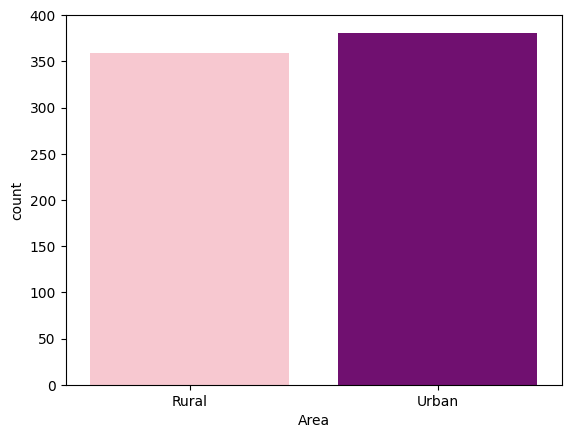

In [122]:
sns.countplot(x='Area',data=df,palette=['pink','purple']) 

Unemployment rate by state



In [124]:
count_by_region=df['Region'].value_counts().rename_axis('State').reset_index(name='Count')
count_by_region.style.background_gradient(cmap='Blues')

,State,Count
0,Andhra Pradesh,28
1,Karnataka,28
2,Uttar Pradesh,28
3,Tripura,28
4,Telangana,28
5,Tamil Nadu,28
6,Rajasthan,28
7,Punjab,28
8,Odisha,28
9,Maharashtra,28


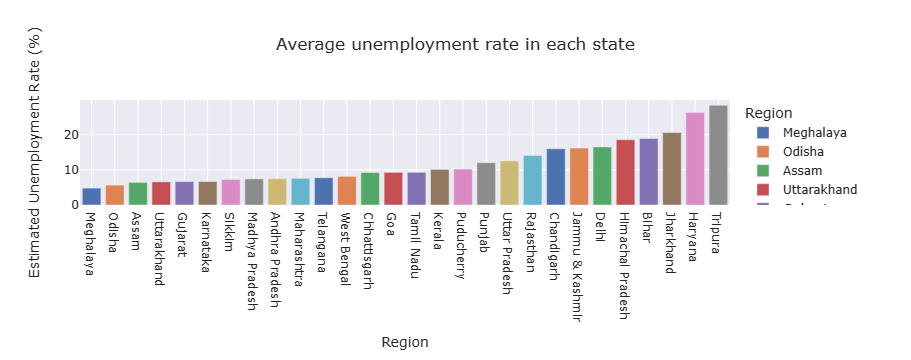

In [134]:
import plotly.express as px
plot_unemp = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

fig = px.bar(df_unemployed, x='Region',y='Estimated Unemployment Rate (%)',color = 'Region',title = 'Average unemployment rate in each state',
             template='seaborn')
fig.show()

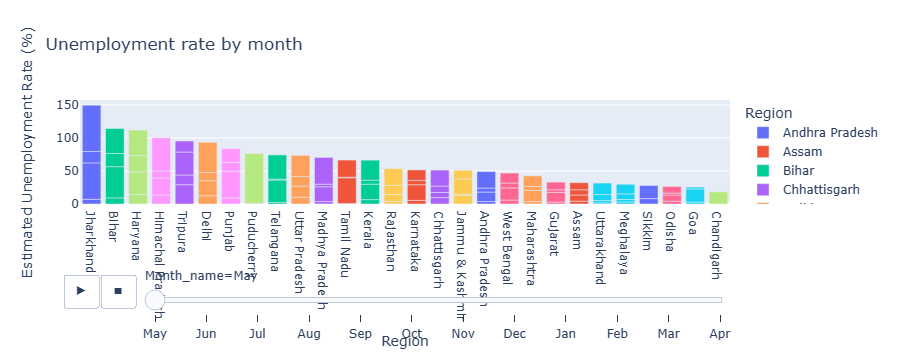

In [136]:
# Bar plot Unemployment Rate (monthly)

fig = px.bar(df,x='Region',y='Estimated Unemployment Rate (%)',animation_frame='Month_name',color='Region',
            title='Unemployment rate by month')

fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

Unemployment rate before and after Lockdown

In [138]:
# data representation before and after lockdown

before_lockdown = df[(df['Month_int']>=1) &(df['Month_int'] <4)]
after_lockdown = df[(df['Month_int'] >=4) & (df['Month_int'] <=6)]

In [140]:
af_lockdown = after_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()

lockdown = before_lockdown.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index()
lockdown['unemployment rate before lockdown'] = af_lockdown['Estimated Unemployment Rate (%)']

lockdown.columns = ['Region','unemployment rate before lockdown','unemployment rate after lockdown']
lockdown.head()

,Region,unemployment rate before lockdown,unemployment rate after lockdown
0,Andhra Pradesh,6.243333,11.126000
1,Assam,6.480000,6.563333
2,Bihar,14.276667,27.459000
3,Chandigarh,19.366667,12.656667
4,Chhattisgarh,8.683333,12.720000


In [141]:
# unenployment rate change after lockdown

lockdown['rate change in unemployment'] =round(lockdown['unemployment rate before lockdown']-lockdown['unemployment rate before lockdown']
                                              /lockdown['unemployment rate after lockdown'],2)

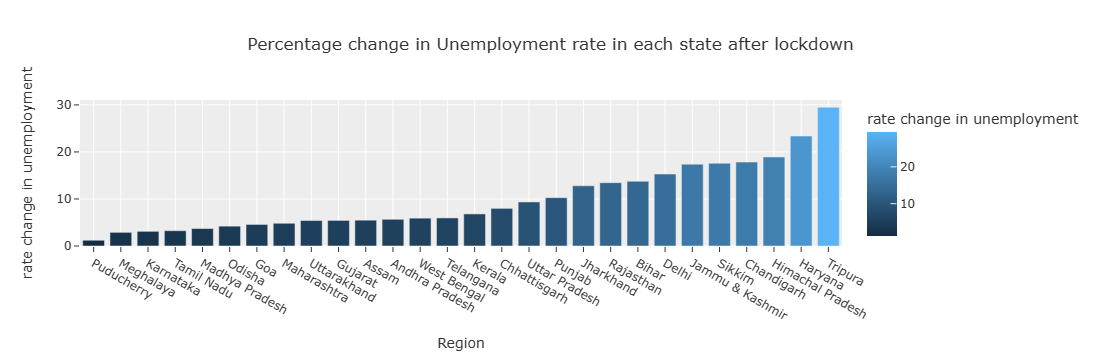

In [143]:
fig = px.bar(lockdown,x='Region',y='rate change in unemployment',color='rate change in unemployment',
            title='Percentage change in Unemployment rate in each state after lockdown',template='ggplot2')
fig.update_layout(xaxis={'categoryorder':'total ascending'})
fig.show()